In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Goal: Use K-Nearest Neighbors (KNN) to predict whether a user will purchase based on age and estimated salary.

Confusion Matrix:
 [[59  4]
 [ 3 34]]
Accuracy: 0.93


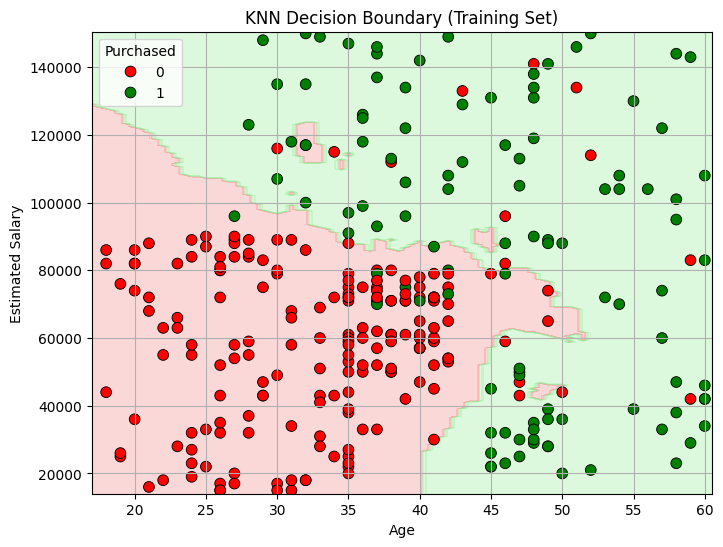

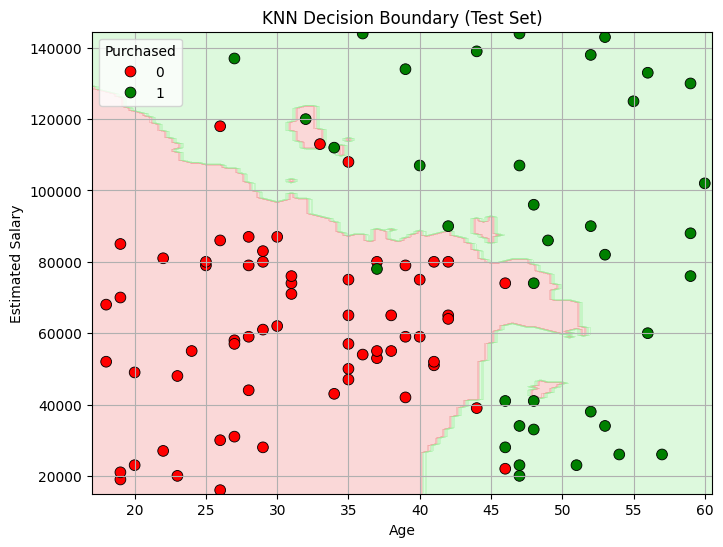

In [13]:
# Load dataset
dataset = pd.read_csv('../datasets/social-network-ads.csv')

# Split dataset into features and target variable
X = dataset.iloc[:, :-1].values  # Features: Age, EstimatedSalary
y = dataset.iloc[:, -1].values  # Target: Purchased

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

from matplotlib.colors import ListedColormap
import seaborn as sns

def plot_knn_decision_boundary(X_scaled, y, model, scaler, title):
    # Inverse transform to original scale
    X_orig = scaler.inverse_transform(X_scaled)
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1000, X_orig[:, 1].max() + 1000

    # Create mesh grid
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.5),
        np.arange(y_min, y_max, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightcoral', 'lightgreen']))
    sns.scatterplot(
        x=X_orig[:, 0], y=X_orig[:, 1],
        hue=y, palette=['red', 'green'],
        edgecolor='k', s=60
    )
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title(title)
    plt.legend(title='Purchased')
    plt.grid(True)
    plt.show()

# Training set decision boundary
plot_knn_decision_boundary(X_train, y_train, model, scaler, 
                           "KNN Decision Boundary (Training Set)")

# Test set decision boundary
plot_knn_decision_boundary(X_test, y_test, model, scaler, 
                           "KNN Decision Boundary (Test Set)")
